#Read Dataset

In [ ]:
import pandas as pd

df = pd.read_csv("dataset.csv", on_bad_lines = 'skip')
df

,Prompt,Bad answer,Good answer,answer_length
0,"Student: Professor, I have a problem. Can you ...","\nTeacher: Of course, let's solve it. What sho...","Teacher: Of course, what's the problem?\n",40
1,"Student: Professor, I have a problem. Can you ...",\nTeacher: Ah,"Teacher: That's correct! Now, can you tell me ...",85
2,"Student: Professor, I have a problem. Can you ...",\nTeacher: So,"Teacher: Excellent work! You're correct, the b...",92
3,"Student: Professor, I'm having trouble solving...",\nTeacher: [speaking to other members of Team ...,"Teacher: Of course, what's the problem you're ...",63
4,"Student: Professor, I'm having trouble solving...",\nTeacher: (,"Teacher: Exactly! So, can you tell me what you...",78
...,...,...,...,...
20527,"Student: Professor, I have a problem. Five bel...",NaN,Teacher: That's correct. They toll together on...,118
20528,"Student: Professor, I have a problem. Five bel...",NaN,"Teacher: I apologize, but the answer is actual...",166
20529,"Student: ""What is f(x)?""\n",NaN,"Teacher: ""f(x) = ax^5 â 3x^2 + ax^2 â x. C...",90
20530,"Student: ""What is f(x)?""\nTeacher: ""f(x) = ax^...",NaN,"Teacher: ""That's okay, let's work through it t...",86


#Check Corrupted Files

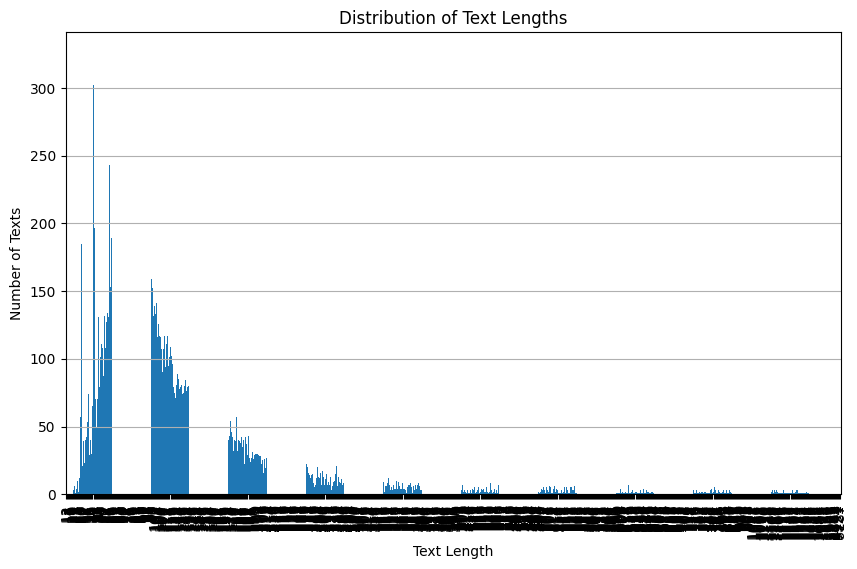

In [ ]:
import matplotlib.pyplot as plt

df['answer_length'] = df['Good answer'].apply(len)

text_length_counts = df['answer_length'].value_counts().sort_index()

text_length_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Number of Texts')
plt.grid(axis='y')
plt.show()

In [ ]:
df_sorted = df.sort_values(by='answer_length')

df_sorted.head(50)

,Prompt,Bad answer,Good answer,answer_length
12242,"Student: Professor, I have a problem, if 28 ma...",NaN,Teacher: 7!\n,12
17411,"Student: Professor, how do I calculate the tim...",NaN,Teacher: 84?\n,13
15724,"Student: Professor, I have a problem. The diff...",NaN,Teacher: Yes?\n,14
14353,Student: How do I solve this problem?\nTeacher...,NaN,Teacher: Yes?\n,14
8371,"Student: Professor, I have a problem in math. ...",NaN,Teacher: Yes?\n\n,15
6088,"Student: Professor, I have a problem. The valu...",NaN,Teacher: Exactly!,17
1841,Student: What is the probability of Jean drawi...,\nTeacher: I,Teacher: Exactly!,17
6128,Student: How long will it take for the bullet ...,NaN,Teacher: Exactly!,17
11072,"Student: ""What is the market value of a stock ...",NaN,Teacher: Exactly!,17
18923,"Student: Professor , how many days will take o...",NaN,Teacher: Correct!,17


In [ ]:
import pandas as pd
from transformers import pipeline

generator = pipeline("text-generation", model="openai-community/gpt2")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
for index, row in df.iterrows():
    if pd.isna(row["Bad answer"]):
        generated_text = generator(str(row["Prompt"]) + "\nTeacher:", max_length=50, num_return_sequences=1)[0]["generated_text"][(len(str(row["Prompt"]))):]
        df.at[index, "Bad answer"] = generated_text
    else:
        print(f"Iteration {index} skipped")

Iteration 0 skipped
Iteration 1 skipped
Iteration 2 skipped
Iteration 3 skipped
Iteration 4 skipped
Iteration 5 skipped
Iteration 6 skipped
Iteration 7 skipped
Iteration 8 skipped
Iteration 9 skipped
Iteration 10 skipped
Iteration 11 skipped
Iteration 12 skipped
Iteration 13 skipped
Iteration 14 skipped
Iteration 15 skipped
Iteration 16 skipped
Iteration 17 skipped
Iteration 18 skipped
Iteration 19 skipped
Iteration 20 skipped
Iteration 21 skipped
Iteration 22 skipped
Iteration 23 skipped
Iteration 24 skipped
Iteration 25 skipped
Iteration 26 skipped
Iteration 27 skipped
Iteration 28 skipped
Iteration 29 skipped
Iteration 30 skipped
Iteration 31 skipped
Iteration 32 skipped
Iteration 33 skipped
Iteration 34 skipped
Iteration 35 skipped
Iteration 36 skipped
Iteration 37 skipped
Iteration 38 skipped
Iteration 39 skipped
Iteration 40 skipped
Iteration 41 skipped
Iteration 42 skipped
Iteration 43 skipped
Iteration 44 skipped
Iteration 45 skipped
Iteration 46 skipped
Iteration 47 skipped
It

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Iteration 4553 skipped
Iteration 4554 skipped
Iteration 4555 skipped
Iteration 4556 skipped
Iteration 4557 skipped
Iteration 4558 skipped
Iteration 4559 skipped
Iteration 4560 skipped
Iteration 4561 skipped


/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1281: UserWarning: Input length of input_ids is 507, but `max_length` is set to 50. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1281: UserWarning: Input length of input_ids is 71, but `max_length` is set to 50. This can lead to unexpected behavior. You should consider increasing `max_new_tokens`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
/usr/local/lib/python3.10/dist-packages/transfo